# Embrace Processing

Preprocessing for Embrace: Resampled csv's from other two notebooks

In [1]:
# %pylab inline
from joblib import load
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import math

In [2]:
# check if a value is nan: if nan, return false, otherwise, true.
def nnan(x):
    try:
        if math.isnan(x):
            return False
        else:
            return True
    except:
        return True

In [3]:
# Take a dataframe & two codes, find indices where annotations change from a1 to a2. Return array.
def isoannos(df, anchange, a1, a2):
    change = np.array([])
    for i in anchange[0][1:]:
        if (df["anno"][i] == a2) & (df["anno"][i - 1] == a1):
            # print(i, df["anno"][i], i-1, df["anno"][i-1])
            change = np.append(change, i)
    try: 
        return change[1:]
    except:
        return change

In [4]:
# Expand array (from isoannos). Returns array of arrays of n numbers before and after each number in arr.
def exarr(arr, n):
    full = np.array([])
    for i in arr:
        full = np.append(full, np.array(range(int(i) - n, int(i) + n)))
    return full

In [5]:
# Normalize. Takes data, divides by largest magnitude number, subtracts first value from all values
# TODO: Order seems to matter -- which one is best, a or b? A seems more true to what we want
def normdata(data):
    data = data - np.array(data)[0]
    data = data/max(abs(data))
    return data

# b = d/max(abs(d))
# b = b - np.array(b)[0]
# a = d - np.array(d)[0]
# a = a / max(abs(a))

In [208]:
# Find delta values: Take a series of numbers, subtract the first value from the next

def delta(data):
    f = data - np.roll(data, 1)
    return f

In [218]:
# RMS
# TODO: I think there's a built-in function for this in math linalg

def RMS(d1, d2, d3):
    f = np.sqrt(d1**2 + d2**2 + d3**2)
    return f

In [6]:
# Patient codes of files to read
patients = ["9W3WM", "C3LMM", "GLDRM", "KVNJM", "NBFLM", "R82RM", "SGFHM",\
            "2A6XM", "D54QM", "FRV5M", "GMQFM", "HWJDM","QNF9M", "ZRAMM"]
# Frequency of files to read
frequency = "1s"

In [232]:
# TODO: read all files
# right now: reads one file
# TODO: use variable for name -- will help with saving
x = pd.read_csv("1s_C3LMM.csv")

In [233]:
# replace all Nan values with most recent annotated value
for i in range(len(x["anno"])):
    if not nnan(x["anno"][i]):
        x.set_value(i, "anno", x["anno"][i-1])

In [234]:
# finds locations of change
# TODO: for each file
annochange = np.where((x != pd.DataFrame.shift(x, 1))["anno"])

In [235]:
# Recode annotations
# Recoding: 0 = still, 1 = slow, 2 = moderate, 3 = vigorous, 4 = unknown, START

remap = {'still': 0, 'slow': 1, 'moderate': 2, 'vigorous': 3, 'unknown':4, 'START':4}
z = x.replace(remap, inplace=False)

In [236]:
y = isoannos(z, annochange, 2, 1)
y

array([   2079.,  349621.,  350548.,  350775.,  368813.,  368927.,
        369760.,  419966.,  426310.,  436174.,  451967.])

In [237]:
# x.loc[y]
# for i in annochange:
    # print(x["anno"][i])
    

In [238]:
surround = 60
final = exarr(y, surround)
final = final.reshape(len(y), 2 * surround)

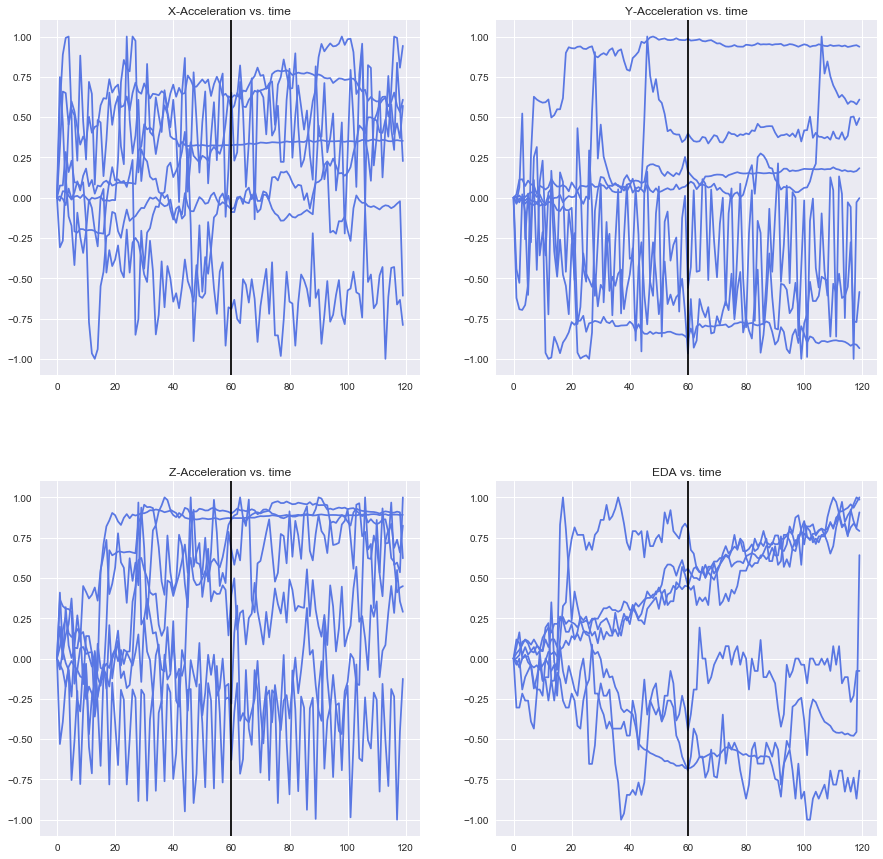

In [244]:
cw= plt.get_cmap('coolwarm')
colors = cw(np.linspace(0,1,len(y)))
f, axarr = plt.subplots(2, 2, figsize=(15, 15))
for i in range(len(y)):
    axarr[0, 0].plot(range(2*surround), normdata(x.X[final[i]]), color=colors[1])
    axarr[0, 1].plot(range(2*surround), normdata(x.Y[final[i]]), color=colors[1])
    axarr[1, 0].plot(range(2*surround), normdata(x.Z[final[i]]), color=colors[1])
    axarr[1, 1].plot(range(2*surround), normdata(x.eda_microsiemens[final[i]]), color=colors[1])
    
axarr[0, 0].axvline(x=surround, color='black')
axarr[0, 1].axvline(x=surround, color='black')
axarr[1, 0].axvline(x=surround, color='black')
axarr[1, 1].axvline(x=surround, color='black')

# If changes in annotation are close to each other: draws line at second change in annotation
# axarr[0, 0].axvline(x=surround + 12, color='black')
# axarr[0, 1].axvline(x=surround + 12, color='black')
# axarr[1, 0].axvline(x=surround + 12, color='black')
# axarr[1, 1].axvline(x=surround + 12, color='black')

axarr[0, 0].set_title('X-Acceleration vs. time')
axarr[0, 1].set_title('Y-Acceleration vs. time')
axarr[1, 0].set_title('Z-Acceleration vs. time')
axarr[1, 1].set_title('EDA vs. time')

f.subplots_adjust(hspace=0.3)
plt.show()

# f.savefig("STUDY_OLID_datatype_process_timeXtoY.[ext]")

In [240]:
f.savefig("DIA_C3LMM_embrace_acc_2min_Mod-Slow.png")

# Deltas

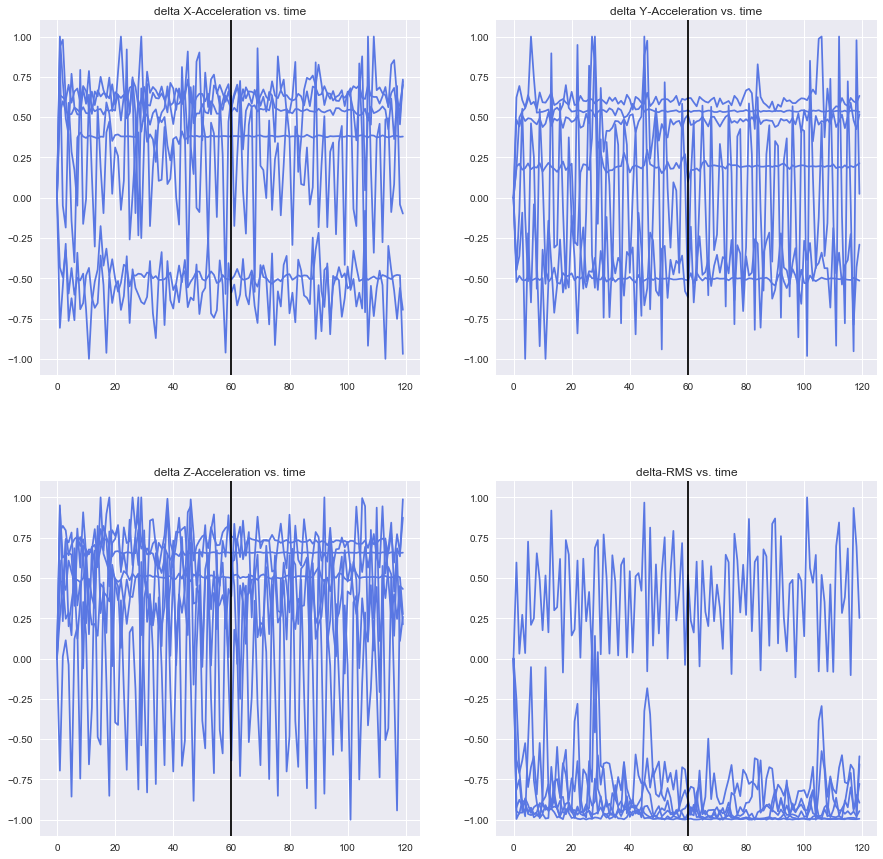

In [245]:
cw= plt.get_cmap('coolwarm')
colors = cw(np.linspace(0,1,len(y)))
f, axarr = plt.subplots(2, 2, figsize=(15, 15))
for i in range(len(y)):
    r = RMS(delta(x.X[final[i]]), delta(x.Y[final[i]]), delta(x.Z[final[i]]))
    axarr[0, 0].plot(range(2*surround), normdata(delta(x.X[final[i]])), color=colors[1])
    axarr[0, 1].plot(range(2*surround), normdata(delta(x.Y[final[i]])), color=colors[1])
    axarr[1, 0].plot(range(2*surround), normdata(delta(x.Z[final[i]])), color=colors[1])
    axarr[1, 1].plot(range(2*surround), normdata(r), color=colors[1])
    
axarr[0, 0].axvline(x=surround, color='black')
axarr[0, 1].axvline(x=surround, color='black')
axarr[1, 0].axvline(x=surround, color='black')
axarr[1, 1].axvline(x=surround, color='black')
# axarr[0, 0].axvline(x=surround + 12, color='black')
# axarr[0, 1].axvline(x=surround + 12, color='black')
# axarr[1, 0].axvline(x=surround + 12, color='black')
# axarr[1, 1].axvline(x=surround + 12, color='black')

axarr[0, 0].set_title('delta X-Acceleration vs. time')
axarr[0, 1].set_title('delta Y-Acceleration vs. time')
axarr[1, 0].set_title('delta Z-Acceleration vs. time')
axarr[1, 1].set_title('delta-RMS vs. time')

f.subplots_adjust(hspace=0.3)
plt.show()

# f.savefig("1s_NBFLM_Vig-Mod_deltas.png")

In [242]:
f.savefig("DIA_C3LMM_embrace_acc_2min_Mod-Slow_deltas.png")

# TODOS

First, all TODOs in code

Second: measure StdDevs so that ranges from -3 to +3, rather than -1 to +1?

Third: Label X axes to be seconds relative to event: -60 to 60

Fourth: Don't bother subplotting XYZ by themselves, get one figure for each individual and subplot type of transition (delta-RMS + EDA with different line types? Different colors while trials are all one color?)